# Chapter 3 Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az
import pymc3 as pm
np.random.seed(seed=0)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
az.style.use('arviz-darkgrid')

## Question 1
***

The priors in this model are

\begin{eqnarray}
\mu \text{~} Normal(0,10) \newline
\sigma \text{~} \left|Normal(0,25) \right|
\end{eqnarray}


The likelihood in our model is  
$$ Normal(\mu, \sigma)$$

And the posterior will be distribution over $\mu$ and $\sigma$, but the posterior is not directly specified in the model.

## Question 2
***

There are two parameters in this model, $\mu$ and $\sigma$

## Question 3
***

Without expanding the denominator

$$ p(\mu, \sigma | y) = \frac{\Pi_i Normal(y| \mu, \sigma) Normal(\mu|0,10) |Normal(\sigma|0,25)|}{p(y)}  $$

Expanding the denominator
$$ p(\mu, \sigma | y) = \frac{\Pi_i Normal(y| \mu, \sigma) Normal(\mu|0,10) |Normal(\sigma|0,25)|}{\int \int \Pi_i Normal(y| \mu, \sigma) Normal(\mu|0,10) |Normal(\sigma|0,25)| d\mu d\sigma} $$

## Question 4
***

The linear model is 
\begin{eqnarray}
\mu = \alpha + \beta x
\end{eqnarray}


The likelihood in our model is  
$$ Normal(\mu, \epsilon)$$

The posterior will have three parameters

$$ \alpha, \beta, \epsilon $$

## Question 5
***

For this exercise we will generate 57 datapoints from a distribution of $N(4,. 5)$

In [3]:
data = stats.norm(4,.5).rvs(size=57)

In [4]:
with pm.Model() as model:
    mu = pm.Normal("mu", 0, 10)
    sd = pm.HalfNormal("sd", 25)
    y = pm.Normal("y,", mu, sd, observed=data)
    
    # Compute both prior, and prior predictive
    prior_predictive = pm.sample_prior_predictive()
    
    # Compute posterior
    trace = pm.sample()
    
    # Compute posterior predictive
    posterior_predictive = pm.sample_posterior_predictive(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, mu]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:01<00:00, 1084.35draws/s]
The acceptance probability does not match the target. It is 0.8806704207811868, but should be close to 0.8. Try to increase the number of tuning steps.
100%|██████████| 1000/1000 [00:00<00:00, 1292.64it/s]


In [5]:
dataset = az.from_pymc3(trace=trace, posterior_predictive=posterior_predictive, prior=prior_predictive)

In [6]:
dataset

Inference data with groups:
	> posterior
	> sample_stats
	> posterior_predictive
	> prior
	> observed_data

Let's plot the prior distributions to get a sense of what the Bayesian model's estimations without data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c1b207cc0>,
      dtype=object)

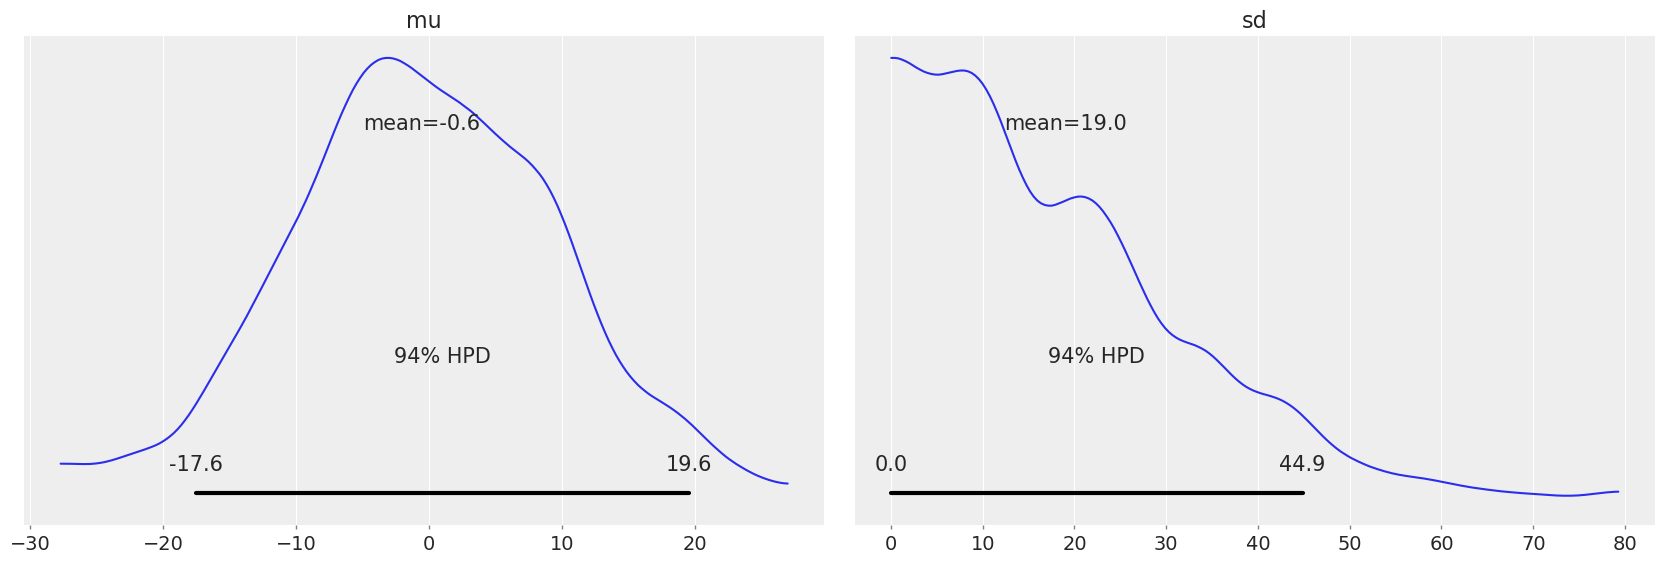

In [7]:
# The plot_posterior method can be used to plot priors as well
az.plot_posterior(dataset.prior, var_names=["mu", "sd"])

We'll also plot the posterior as well to check the distributions after updates. You'll notice that the posterior for SD is bimodel, this is a result of our model definition which dates the absolute value of sd.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c282e27b8>,
      dtype=object)

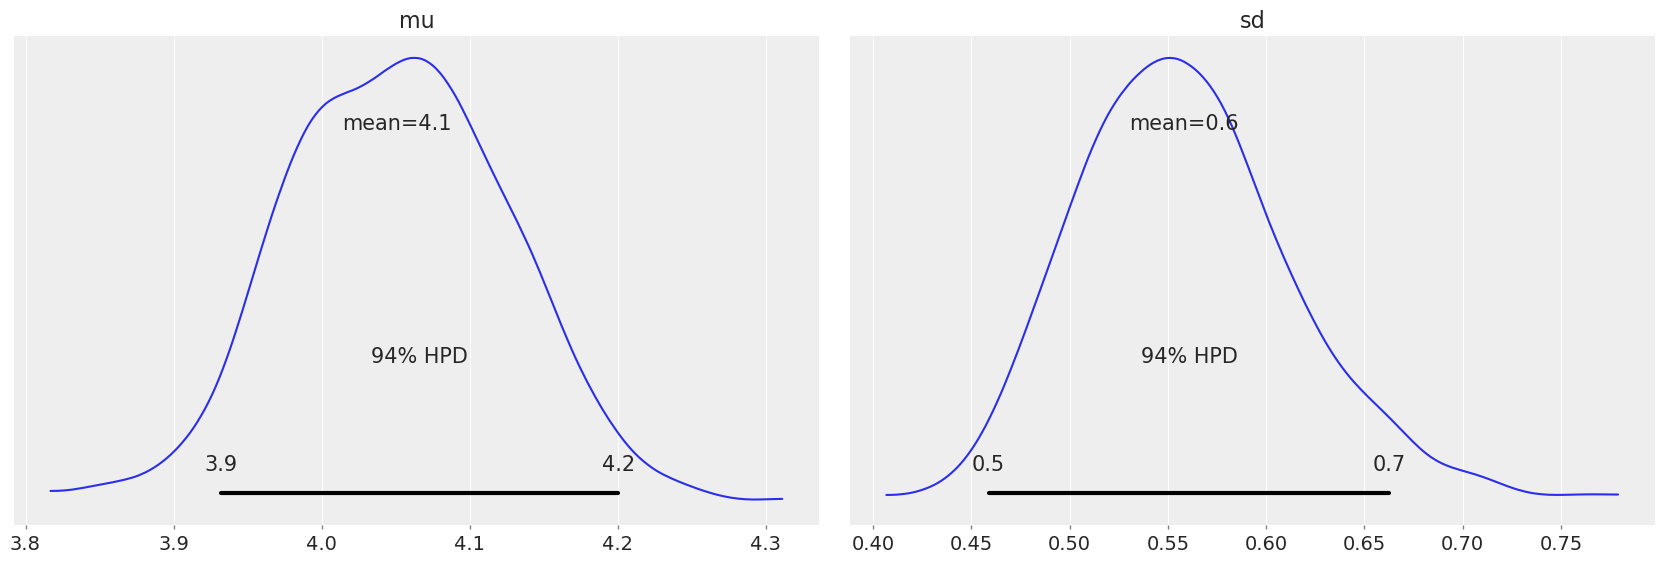

In [8]:
# Compare above plot to posterior distribution below, as well as to original parameters in distribution
az.plot_posterior(dataset)

In [9]:
dataset.prior

<xarray.Dataset>
Dimensions:   (chain: 1, draw: 500, y,_dim_0: 57)
Coordinates:
  * chain     (chain) int64 0
  * draw      (draw) int64 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
  * y,_dim_0  (y,_dim_0) int64 0 1 2 3 4 5 6 7 8 ... 48 49 50 51 52 53 54 55 56
Data variables:
    sd        (chain, draw) float64 0.5084 33.7 19.04 ... 79.27 4.737 33.71
    y,        (chain, draw, y,_dim_0) float64 3.632 2.833 1.979 ... -33.26 11.49
    mu        (chain, draw) float64 3.025 -6.343 -3.627 ... -6.78 12.98 -23.64
    sd_log__  (chain, draw) float64 -0.6766 3.517 2.947 ... 4.373 1.556 3.518
Attributes:
    created_at:                 2019-03-16T02:34:03.270827
    inference_library:          pymc3
    inference_library_version:  3.6

Let's also plot the prior predictive values, we'll need to do some data manipulation to get the data into a format we can use with ArviZ

In [10]:
print(dataset.prior["y,"].values.shape)
prior_predictive = dataset.prior["y,"].values.flatten()
prior_predictive.shape

(1, 500, 57)


(28500,)

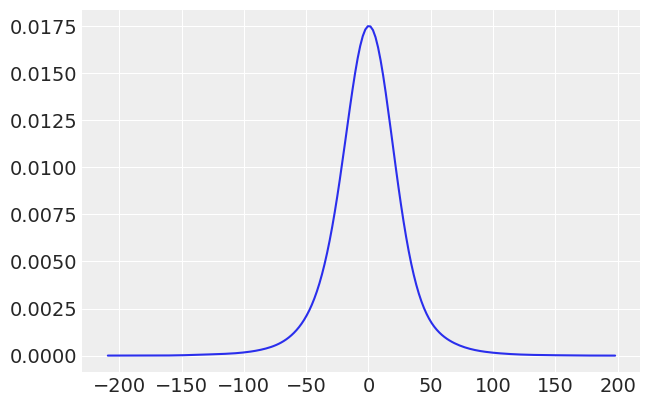

In [11]:
az.plot_kde(prior_predictive)

We can them compare this to the posterior predictive distribution

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c28da19b0>],
      dtype=object)

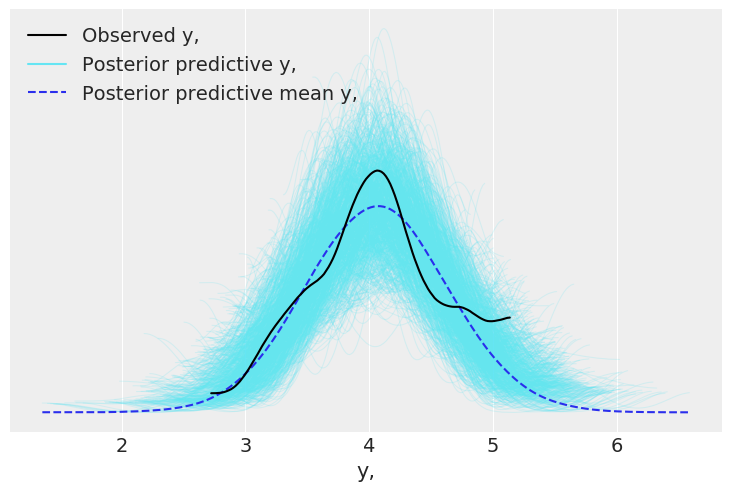

In [12]:
az.plot_ppc(dataset)